In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("openweatherchennai.csv", usecols = ["temp","dew_point","feels_like","temp_min","temp_max","pressure","humidity","wind_speed","wind_deg","clouds_all","weather_main"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388235 entries, 0 to 388234
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   temp          388235 non-null  float64
 1   dew_point     388235 non-null  float64
 2   feels_like    388235 non-null  float64
 3   temp_min      388235 non-null  float64
 4   temp_max      388235 non-null  float64
 5   pressure      388235 non-null  int64  
 6   humidity      388235 non-null  int64  
 7   wind_speed    388235 non-null  float64
 8   wind_deg      388235 non-null  int64  
 9   clouds_all    388235 non-null  int64  
 10  weather_main  388235 non-null  object 
dtypes: float64(6), int64(4), object(1)
memory usage: 32.6+ MB
None


In [2]:
df.isnull().sum()

temp            0
dew_point       0
feels_like      0
temp_min        0
temp_max        0
pressure        0
humidity        0
wind_speed      0
wind_deg        0
clouds_all      0
weather_main    0
dtype: int64

In [3]:
df.corr(method ='pearson')

,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all
temp,1.000000,0.041644,0.895410,0.945848,0.929758,-0.633299,-0.623500,0.358674,0.355078,0.049750
dew_point,0.041644,1.000000,0.388679,0.126664,-0.190014,-0.159318,0.742628,-0.164678,0.005732,0.164028
feels_like,0.895410,0.388679,1.000000,0.893068,0.740039,-0.609219,-0.299886,0.277763,0.306689,0.079901
temp_min,0.945848,0.126664,0.893068,1.000000,0.806206,-0.594194,-0.538454,0.388173,0.342704,0.097764
temp_max,0.929758,-0.190014,0.740039,0.806206,1.000000,-0.572550,-0.744682,0.341951,0.318968,-0.036325
pressure,-0.633299,-0.159318,-0.609219,-0.594194,-0.572550,1.000000,0.276024,-0.269075,-0.374152,-0.217958
humidity,-0.623500,0.742628,-0.299886,-0.538454,-0.744682,0.276024,1.000000,-0.379459,-0.219921,0.102270
wind_speed,0.358674,-0.164678,0.277763,0.388173,0.341951,-0.269075,-0.379459,1.000000,0.322428,0.141797
wind_deg,0.355078,0.005732,0.306689,0.342704,0.318968,-0.374152,-0.219921,0.322428,1.000000,0.144922
clouds_all,0.049750,0.164028,0.079901,0.097764,-0.036325,-0.217958,0.102270,0.141797,0.144922,1.000000


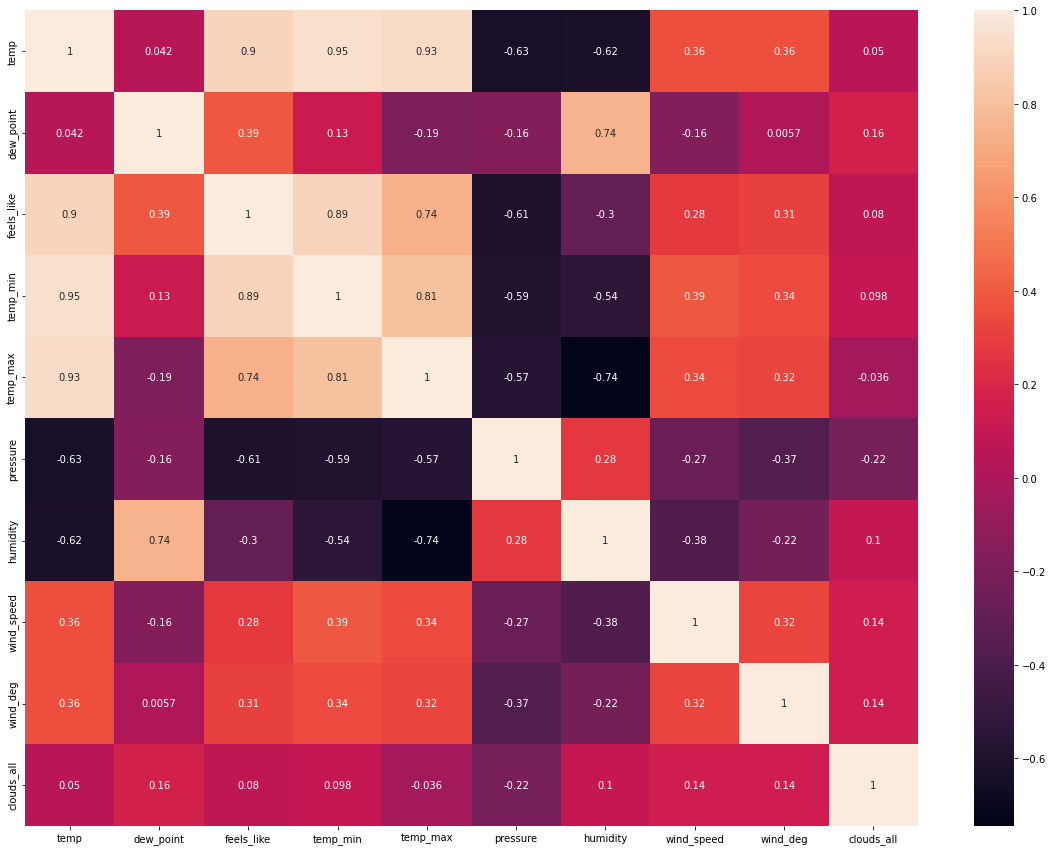

In [4]:
plt.figure(figsize=(20,15))
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [5]:
def correlation(features, threshold):
  correlated_features = set()
  correlation_matrix = features.corr()
  for i in range(len(correlation_matrix.columns)):
    for j in range(i):
      if abs(correlation_matrix.iloc[i,j])>threshold:
        colname = colname = correlation_matrix.columns[i]
        correlated_features.add(colname)
  return correlated_features

In [6]:
correlated_features = correlation(df, 0.9)
correlated_features

{'temp_max', 'temp_min'}

In [7]:
df.drop(columns = ["temp_max", "temp_min"])

,temp,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main
0,23.70,21.59,24.42,1014,88,0.50,360,20,Haze
1,23.65,21.54,24.37,1014,88,0.50,360,20,Haze
2,23.25,20.97,23.90,1015,87,2.84,28,18,Clouds
3,25.63,23.49,26.55,1016,88,1.00,320,20,Clouds
4,25.70,23.56,26.62,1016,88,1.00,320,20,Clouds
...,...,...,...,...,...,...,...,...,...
388230,28.42,25.85,34.30,1009,86,2.06,170,40,Mist
388231,28.27,26.09,34.23,1009,88,3.09,170,75,Mist
388232,28.18,26.38,34.32,1008,90,2.57,190,75,Mist
388233,28.18,26.38,34.32,1008,90,1.54,210,75,Mist


In [8]:
cols = df.columns

In [9]:
X = df
y = df['weather_main']

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['weather_main'] = le.fit_transform(X['weather_main'])
y = le.transform(y)

In [11]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(df)
X = pd.DataFrame(X, columns = [cols])

In [12]:
X.head()

,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main
0,0.243779,0.719502,0.211401,0.182903,0.266845,0.658385,0.868132,0.011312,1.000000,0.20,0.454545
1,0.241670,0.718087,0.209772,0.182903,0.266080,0.658385,0.868132,0.011312,1.000000,0.20,0.454545
2,0.224800,0.701953,0.194463,0.270775,0.204058,0.664596,0.857143,0.064253,0.077778,0.18,0.090909
3,0.325179,0.773280,0.280782,0.262425,0.331547,0.670807,0.868132,0.022624,0.888889,0.20,0.090909
4,0.328132,0.775262,0.283062,0.262425,0.328867,0.670807,0.868132,0.022624,0.888889,0.20,0.090909


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [14]:
kmeans.cluster_centers_

array([[0.46997784, 0.75394307, 0.47548091, 0.46903683, 0.47070608,
        0.61475924, 0.67957976, 0.07186647, 0.60988153, 0.45012234,
        0.19157774],
       [0.35288979, 0.73060492, 0.32358546, 0.35918196, 0.35361234,
        0.64223509, 0.76260892, 0.04154052, 0.11791414, 0.36429086,
        0.27733725]])

In [15]:
kmeans.inertia_

92278.48245672368

In [16]:
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 93347 out of 388235 samples were correctly labeled.


In [17]:
print('Accuracy score: {0:0.4f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.2404


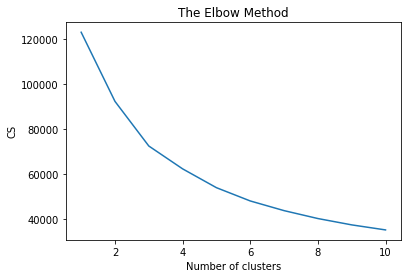

In [18]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.4f}'. format(correct_labels/float(y.size)))

Result: 118395 out of 388235 samples were correctly labeled.
Accuracy score: 0.3050
